In [1]:
import pandas as pd

data = pd.read_csv('./Default.csv')

In [95]:
import numpy as np
from sklearn.model_selection import train_test_split

X = data.drop('default', axis=1)
y = data.default

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [96]:
X_train.head()

,Unnamed: 0,student,balance,income
7496,7497,Yes,651.548784,23374.832967
7694,7695,Yes,819.912191,16585.028099
9248,9249,No,43.143500,34316.890148
2470,2471,No,1601.877950,27885.163551
4392,4393,No,894.627906,39027.630277


In [58]:
X_train.describe()

,Unnamed: 0,balance,income
count,8000.000000,8000.000000,8000.000000
mean,5026.403000,838.697007,33427.347585
std,2887.523191,484.743365,13360.645312
min,2.000000,0.000000,771.967729
25%,2526.750000,484.408197,21164.183672
50%,5040.500000,824.016365,34412.656143
75%,7522.250000,1170.912896,43694.845045
max,10000.000000,2654.322576,73554.233495


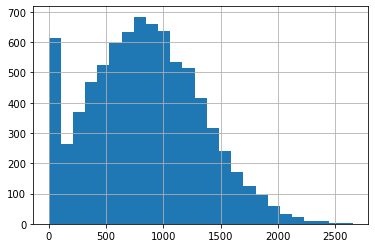

In [59]:
X_train.balance.hist(bins=25)

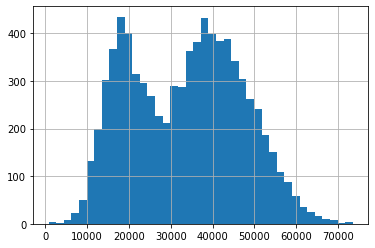

In [60]:
X_train.income.hist(bins=40)

<BarContainer object of 2 artists>

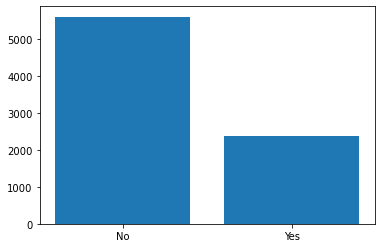

In [61]:
import matplotlib.pyplot as plt

plt.bar(list(X_train.student.value_counts().index), list(X_train.student.value_counts()[:]))

In [80]:
combined_data = X_train.copy()
combined_data['default'] = y_train
result = combined_data.loc[combined_data['student'] == 'No'].default.value_counts()
result[1]/result[0]

0.029708417384925728

In [81]:
combined_data = X_train.copy()
combined_data['default'] = y_train
result = combined_data.loc[combined_data['student'] == 'Yes'].default.value_counts()
result[1]/result[0]

0.04513584574934268

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scler', StandardScaler()),
])

In [86]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, ['balance', 'income']),
    ('cat', OrdinalEncoder(), ['student']),
])

In [88]:
prepared_X = full_pipeline.fit_transform(X_train)

In [113]:
o_encoder = OrdinalEncoder()
encoded_y = o_encoder.fit_transform(pd.DataFrame(y_train))

In [115]:
o_encoder.categories_

[array(['No', 'Yes'], dtype=object)]

In [135]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(prepared_X, encoded_y.reshape(1, 8000)[0])

LogisticRegression()

In [137]:
predictions = log_reg.predict(prepared_X)

In [139]:
from sklearn.metrics import confusion_matrix, accuracy_score

cnf = confusion_matrix(encoded_y.reshape(1, 8000)[0], predictions)

In [140]:
cnf

array([[7700,   35],
       [ 180,   85]], dtype=int64)